# 8.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer #IterativeImputery są eksperymentalnymi metodami, 
                                                          #aby móc z nich korzystać musimy wywołać tą linijkę
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import LinearSVC 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
df = pd.read_csv('heart.csv')
x, y = df.values[:,:-1], df.values[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

## b) Skalowaniw zmiennych

In [ ]:
scaler = StandardScaler() #skalowanie danych (niezmiernie ważne przy kNN-ach jest to aby wszystki kolumny były zestandaryzowane)
X_train_std = scaler.fit_transform(x_train) # liczymy kolumna po kolumnie średnie i odchylenia standardowe (część fit) i skalujemy kolumny
                                            # (część transform)
X_test_std = scaler.transform(x_test) #za pomocą średnich i odchyleń z części treningowej skalujemy dane testowe

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

## c) metoda k - sąsiadów

In [ ]:
modele = []
AUC = []

In [ ]:
for k in [10, 20, 40, 60, 100]:
  model_knn = KNeighborsClassifier(n_neighbors = k)
  model_knn = model_knn.fit(X_train_std, y_train)
  a = model_knn.predict(X_test_std)
  predict_probs = model_knn.predict_proba(X_test_std)
  AUC.append(roc_auc_score(y_test, predict_probs[:,1]))
  modele.append(a)

TypeError: ignored

In [ ]:
modele

[array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1.]),
 array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 

In [ ]:
AUC

[0.9217974180734857,
 0.9252730883813307,
 0.9205561072492553,
 0.9158391261171798,
 0.9252730883813307]

In [ ]:
AUC == max(AUC)

array([False,  True, False, False,  True])

In [ ]:
np.where(AUC == max(AUC))

(array([1, 4]),)

## e) Różne metody obciążania sąsiadów - jednolita lub ze względu na odległość

In [ ]:
k1 = KNeighborsClassifier(n_neighbors=20, weights = 'uniform')
k2 = KNeighborsClassifier(n_neighbors = 20, weights= 'distance')

In [ ]:
k1 = k1.fit(X_train_std, y_train)
k2 = k2.fit(X_train_std, y_train)
proba1 = k1.predict_proba(X_test_std)[:,1]
proba2 = k2.predict_proba(X_test_std)[:,1]
print(roc_auc_score(y_test, proba1))
print(roc_auc_score(y_test,proba2))

0.9252730883813307
0.9280039721946376


# 8.2

In [ ]:
uploaded = files.upload()

Saving pima.csv to pima.csv


In [ ]:
df2 = pd.read_csv('pima.csv')

In [ ]:
df2

,times,glucose,blood,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x, y = df2.values[:,:-1], df2.values[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle= False, test_size=0.3)

(array([ 27.,   0.,   2.,   8.,  69., 202., 162.,  54.,  10.,   3.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

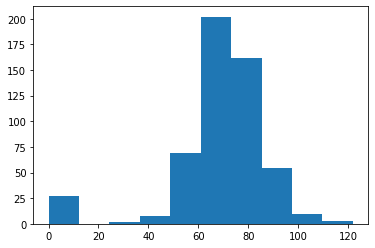

In [ ]:
plt.hist(x = x_train[:,2])

## c) Braki danych -podstawowe wypełnianie 

In [ ]:
#robimy kopie, aby nie wpływać na zbiory podstawowe
x_train2 = x_train.copy()
x_test2 = x_test.copy()

In [ ]:
#przypoisujemy -5 bo w całym zbioerze nie ma wartosci ujemnych
x_train2[:,2][x_train2[:,2] == 0] = -5
x_test2[:,2][x_test2[:,2] == 0] = -5

In [ ]:
imput1 = SimpleImputer(missing_values= - 5) #domyslnie strategy = mean
imput2 = SimpleImputer(missing_values = -5, strategy= "median")

In [ ]:
x_train_mean = x_train2.copy()
x_test_mean = x_test2.copy()
x_train_median = x_train2.copy()
x_test_median = x_test2.copy()

In [ ]:
#do simple imputera trzeba zreshapowac dane
x_blood_train = np.reshape(x_train_mean[:,2], (-1,1))
x_blood_test = np.reshape(x_test_mean[:,2], (-1,1))
x_blood_train_median = np.reshape(x_train_median[:,2], (-1,1))
x_blood_test_median = np.reshape(x_test_median[:,2], (-1,1))

In [ ]:
x_train_mean[:,2] = imput1.fit_transform(x_blood_train).flatten()
x_train_median[:,2] = imput2.fit_transform(x_blood_train_median).flatten()

SimpleImputer(missing_values=-5)

In [ ]:
#na zbiorze testowym uzupełniamy braki za pomocą wyliczen na zbiorze treningowym
x_test_mean[:,2] = imput1.transform(x_blood_test).flatten()
x_test_median[:,2] = imput2.transform(x_blood_test).flatten()

## d) Braki danych - zaawansowane uzupełnianie

In [ ]:
#Iterative imputery działają inaczej. Z reguły wykorzystują metody regresyjne, aby opisywać zmienną objaśniającą
#mającą braki danych pozostałymi zmiennymi objascniającymi, braki danych są wypełniane predykcjami uzyskanymi za pomocą tak dopasowanych modelów,
#i danych z pozostałych zmiennych objaśniających.

it_imp_ridge = IterativeImputer(missing_values = -5,estimator = BayesianRidge(n_iter = 10000000000000)) #tu jako metody regresyjnej 
                                                                                                        #używamy regresji grzbietowej
it_imp_tree = IterativeImputer(missing_values = -5,estimator = DecisionTreeRegressor())#tu jako metody regresyjnej 
                                                                                       #używamy decyzyjnego drzewa regresyjnego
X_train_ridge = x_train2.copy()
X_test_ridge = x_test2.copy()
X_train_tree = x_train2.copy()
X_test_tree = x_test2.copy()
X_train_ridge = it_imp_ridge.fit_transform(X_train_ridge) #dopasowywanie modelu na danych treningowych 
                                                          #i wypełnianie braków danych za pomocą predykcji na tym samym zbiorze
X_test_ridge = it_imp_ridge.transform(X_test_ridge) #wypełnianie braków danych na zb. testowym za pomocą predykcji 
                                                    #z dopasowanego modelu na danych treningowych.
X_train_tree = it_imp_tree.fit_transform(X_train_tree) #tu podobne tylko z innym regresorem
X_test_tree = it_imp_tree.transform(X_test_tree)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# 8.3

In [ ]:
df3 = pd.read_csv('abalone.csv')

In [ ]:
df3

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
4,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
...,...,...,...,...,...,...,...,...,...
2829,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
2830,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
2831,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
2832,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
x, y = df3.values[:,1:], df3.values[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = False, test_size = 0.3)

## b) oznaczanie zmiennych jako braki danych

In [ ]:
#metoda 3 odchylen standardowych
x_train_std = x_train[:,-1].copy()
x_train_std[(x_train_std > np.mean(x_train_std) + 3*np.std(x_train_std)) | (x_train_std < np.mean(x_train_std) - 3*np.std(x_train_std))] = np.nan
x_test_std = x_test[:,-1].copy()
x_test_std[(x_test_std > np.mean(x_test_std) + 3*np.std(x_test_std)) | (x_test_std < np.mean(x_test_std) - 3*np.std(x_test_std))] = np.nan

In [ ]:
x_train_std

array([ 7.,  9., 10., ...,  9., 10., 10.])

In [ ]:
# metoda Mahalanopisa
loc=EllipticEnvelope()
#współczynniki modelu są liczone na części treningowej i używane na części treningowej i testowej do znalezienia outlierów 
#(fit_predict na części treningowej i predict na testowej).
rings_train2 = x_train[:,-1].copy()
rings_test2 = x_test[:,-1].copy()
rings_train2[loc.fit_predict(np.reshape(rings_train2,(-1,1)))==-1]=np.nan
rings_test2[loc.predict(np.reshape(rings_test2,(-1,1)))==-1]=np.nan

In [ ]:
X_train_out = x_train.copy()
X_test_out = x_test.copy()
X_train_out[:,-1] = x_train_std
X_test_out[:,-1] = x_test_std

X_train_out2 = x_train.copy()
X_test_out2 = x_test.copy()
X_train_out2[:,-1] = rings_train2
X_test_out2[:,-1] = rings_test2

In [ ]:
imp = SimpleImputer(strategy = 'median')
X_train_out = imp.fit_transform(X_train_out)
X_test_out = imp.fit(X_test_out)
X_train_out2 = imp.fit_transform(X_train_out2)
X_test_out2 = imp.fit(X_test_out2)

In [ ]:
svm = LinearSVC(max_iter = 1000000)
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test))
svm.fit(X_train_out,y_train)
print(svm.score(X_test_out,y_test))
svm.fit(X_train_out2,y_train)
print(svm.score(X_test_out2,y_test))

0.5628672150411281


ValueError: ignored

In [ ]:
#b
X_train = x_train.copy()
X_test = x_test.copy()
rings_train = X_train[:,-1].copy()
rings_test = X_test[:,-1].copy()
#znajdujemy braki danych za pomocą średnich i median liczonych na części treningowej
which_outliers_train = (rings_train>np.mean(rings_train)+3*np.std(rings_train))|(rings_train<np.mean(rings_train)-3*np.std(rings_train))
which_outliers_test = (rings_test>np.mean(rings_train)+3*np.std(rings_train))|(rings_test<np.mean(rings_train)-3*np.std(rings_train))
#przerabiamy je na np.nan
rings_train[which_outliers_train] = np.nan
rings_test[which_outliers_test] = np.nan
X_train_out = X_train.copy()
X_test_out = X_test.copy()
X_train_out[:,-1] = rings_train
X_test_out[:,-1] = rings_test

rings_train2 = X_train[:,-1].copy()
rings_test2 = X_test[:,-1].copy()

#możemy ewentualnie zastosować do znajdowania outlierów metodę opartą na kowariancji i odległościach Mahalanobisa
loc=EllipticEnvelope()
#współczynniki modelu są liczone na części treningowej i używane na części treningowej i testowej do znalezienia outlierów 
#(fit_predict na części treningowej i predict na testowej).
rings_train2[loc.fit_predict(np.reshape(rings_train2,(-1,1)))==-1]=np.nan
rings_test2[loc.predict(np.reshape(rings_test2,(-1,1)))==-1]=np.nan

X_train_out2 = X_train.copy()
X_test_out2 = X_test.copy()
X_train_out2[:,-1] = rings_train2
X_test_out2[:,-1] = rings_test2

In [ ]:
#c
#outliery wyliczone w taki czy inny sposób wypełniamy medianą liczoną na obserwacjach, które outlierami nie były.
simp_imp_median = SimpleImputer(strategy = 'median')
X_train_out = simp_imp_median.fit_transform(X_train_out)
X_test_out = simp_imp_median.transform(X_test_out)
X_train_out2 = simp_imp_median.fit_transform(X_train_out2)
X_test_out2 = simp_imp_median.transform(X_test_out2)

In [ ]:
#d
#dopasowujemy SVM do tak przerobionych danych i liczymy dokładność
svm = LinearSVC(max_iter = 1000000)
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))
svm.fit(X_train_out,y_train)
print(svm.score(X_test_out,y_test))
svm.fit(X_train_out2,y_train)
print(svm.score(X_test_out2,y_test))

0.5628672150411281
0.5628672150411281
0.5628672150411281
